# Good Vibrations

In [135]:
%matplotlib inline

import sys
sys.path.append('../ThinkDsp')
import thinkdsp
import thinkplot

import matplotlib.pyplot as plt
import numpy as np

## Intervals and Frequencies

In [136]:
frequency = 110
ratio = [1, 2, 4, 8]

In [137]:
wave = thinkdsp.rest(0)
for i in range(4):
    fw = frequency * ratio[i]
    ww = thinkdsp.sin_wave(fw, 1)
    ww.apodize()
    wave = wave | ww
    
wave.normalize()
wave.make_audio()

## Notes of the first 5 harmonics

In [138]:
frequency = 220

In [139]:
wave = thinkdsp.sin_wave(frequency, 1)
for h in range(2,6):
    harmonic_frequency = h * frequency
    waveh = thinkdsp.sin_wave(harmonic_frequency, 1)
    waveh.apodize()
    wave = wave | waveh 
    
wave.normalize()
wave.make_audio()

## Adjusting the notes of harmonics 

In [140]:
frequency = 220

In [141]:
octave_frequency = 2 * frequency

wave = thinkdsp.sin_wave(frequency, 1)
for h in range(2,6):
    harmonic_frequency = h * frequency
    while harmonic_frequency > octave_frequency:
        harmonic_frequency = harmonic_frequency / 2
    waveh = thinkdsp.sin_wave(harmonic_frequency, 1)
    waveh.apodize()
    wave = wave | waveh 

wave.normalize()
wave.make_audio()

## Octave (2:1)

In [142]:
frequency = 220

In [143]:
def makeTwoNotes(f1, ratio):
    f2 = ratio * f1
    wave = thinkdsp.sin_wave(f1, 1)
    w = thinkdsp.sin_wave(f2, 1)
    w.apodize()
    wave = wave | w
    wave.normalize()
    return wave

In [144]:
wave = makeTwoNotes(frequency, 2/1)
wave.make_audio()

## Fifth (3:2)

In [145]:
wave = makeTwoNotes(frequency, 3/2)
wave.make_audio()

## Fourth (4:3)

In [146]:
wave = makeTwoNotes(frequency, 4/3)
wave.make_audio()

## Whole Tone / Second (9:8)

In [147]:
wave = makeTwoNotes(frequency, 9/8)
wave.make_audio()

## Major Third (5:4)

In [148]:
wave = makeTwoNotes(frequency, 5/4)
wave.make_audio()

## Minor Third (6:5)

In [149]:
wave = makeTwoNotes(frequency, 6/5)
wave.make_audio()

## Special Ratios

In [150]:
frequency = 261.63     # C4

In [151]:
ratio =[4,6,8,9,12,16]

wave = thinkdsp.rest(0)
for i in range(6):
    fw = frequency * ratio[i]/4
    ww = thinkdsp.sin_wave(fw, 1)
    ww.apodize()
    wave = wave | ww
wave.normalize()
wave.make_audio()

<hr>

## Harmonic Series

In [152]:
frequency = 64

In [153]:
wave = thinkdsp.rest(0)
for h in range(16):
    harmonic_frequency = h * frequency
    waveh = thinkdsp.sin_wave(harmonic_frequency, 0.5)
    waveh.apodize()
    wave = wave | waveh 
wave.normalize()
wave.make_audio()

## Spectrum of guitar

In [154]:
wave = thinkdsp.read_wave('A4_guitar.wav')
wave.make_audio()

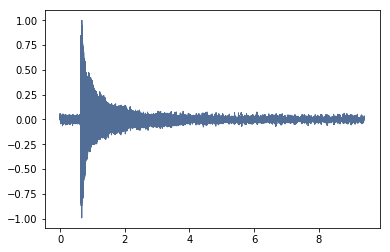

In [155]:
wave.plot(linewidth=1)

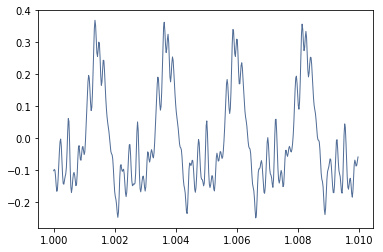

In [156]:
segment = wave.segment(start=1, duration=0.01)
segment.plot(linewidth=1)

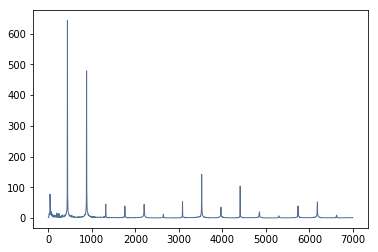

In [157]:
segment = wave.segment(start=1, duration=0.2)
spectrum = segment.make_spectrum()
spectrum.plot(high=7000, linewidth=1)

## Spectrum of handbell

In [158]:
wave = thinkdsp.read_wave('A4_handbell.wav')
wave.make_audio()

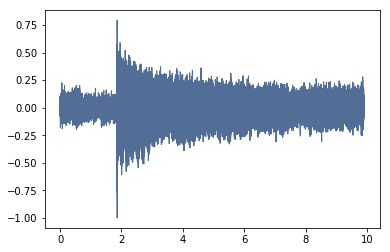

In [159]:
wave.plot(linewidth=1)

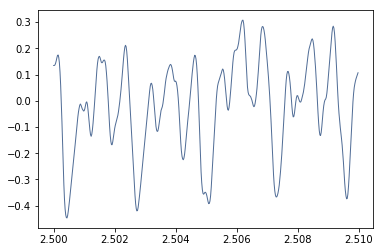

In [160]:
segment = wave.segment(start=2.5, duration=0.01)
segment.plot(linewidth=1)

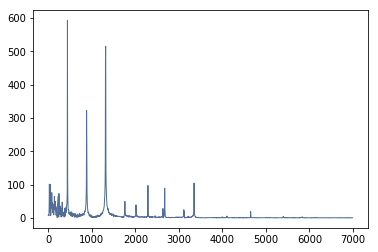

In [161]:
segment = wave.segment(start=2.5, duration=0.2)
spectrum = segment.make_spectrum()
spectrum.plot(high=7000, linewidth=1)

## Not exact 1:1

In [162]:
frequency = 220

In [163]:
def makeTwoSoundJointly(f1, ratio):
    f2 = ratio * f1
    wave = thinkdsp.sin_wave(f1, 2)
    wave = wave + thinkdsp.sin_wave(f2, 2)
    wave.normalize()
    return wave

In [164]:
wave = makeTwoSoundJointly(frequency, 1.1)
wave.make_audio()

## Exact 2:1

In [165]:
wave = makeTwoSoundJointly(frequency, 2)
wave.make_audio()

## Not exact 2:1

In [166]:
wave = makeTwoSoundJointly(frequency, 2.1)
wave.make_audio()

<hr>

In [167]:
def make_scale_wave(f, s):
    l = len(s)
    wave = thinkdsp.rest(0)
    for i in range(l):
        fw = f * s[i]
        ww = thinkdsp.sin_wave(fw, 1)
        ww.apodize()
        wave = wave | ww
    wave.normalize()
    return wave

In [168]:
def make_triad_wave(f, s):
    wave = thinkdsp.sin_wave(f, 2)
    wave = wave + thinkdsp.sin_wave(f * s[2], 2)
    wave = wave + thinkdsp.sin_wave(f * s[4], 2)
    wave.apodize()
    wave.normalize()

    return(wave)

In [169]:
def make_1_3_wave(f, s):
    wave = thinkdsp.sin_wave(f, 2)
    wave = wave + thinkdsp.sin_wave(f * s[2], 2)
    wave.apodize()
    wave.normalize()

    return(wave)

In [170]:
def compare_scale_wave(frequency, scale1, scale2):
    w1 = make_scale_wave(frequency,scale1)
    w2 = make_scale_wave(frequency,scale2)
    wave = w1 + w2 
    wave.normalize()
    return(wave)

In [171]:
def compare_triad_wave(f, s1, s2):
    wave1 = make_triad_wave(f,s1)
    wave2 = make_triad_wave(f,s2)

    wave = wave1 | thinkdsp.rest(1)
    wave = wave | wave2
    wave.normalize()
    return(wave)

## Just Intonation

### Major scale in just intonation

$1, 9/8, 5/4, 4/3, 3/2, 5/3, 15/8, 2$

In [172]:
frequency = 261.63   # C4

In [173]:
ji_major_scale = [1, 9/8, 5/4, 4/3, 3/2, 5/3, 15/8, 2]
wave = make_scale_wave(frequency, ji_major_scale)
wave.make_audio()

### All notes in just intonation

$1, 16/15, 9/8, 6/5, 5/4, 4/3, 45/32, 3/2, 8/5, 5/3, 9/5, 15/8, 2$

In [174]:
ji_chromatic_scale = [1, 16/15, 9/8, 6/5, 5/4, 4/3, 45/32, 3/2, 8/5, 5/3, 9/5, 15/8, 2]
wave = make_scale_wave(frequency, ji_chromatic_scale)
wave.make_audio()

### Key D in C scale of just intonation

In [175]:
frequency = 261.63   # C4
note_list = [4,4,5,7,7,5,4,2,0,0,2,4,4,2,2]

wave1 = thinkdsp.rest(0)
for note in note_list:
    f = frequency * ji_chromatic_scale[note+2]
    w = thinkdsp.sin_wave(f, 0.5)
    w.apodize()
    wave1 = wave1 | w
    
wave1.normalize()
wave1.make_audio()

### Key D in D scale of just intonation

In [176]:
frequency = 261.63 * 9/8  # D4
note_list = [4,4,5,7,7,5,4,2,0,0,2,4,4,2,2]

wave2 = thinkdsp.rest(0)
for note in note_list:
    f = frequency * ji_chromatic_scale[note]
    w = thinkdsp.sin_wave(f, 0.5)
    w.apodize()
    wave2 = wave2 | w
    
wave2.normalize()
wave2.make_audio()

### Comparsion of two scales

In [177]:
wave = wave1 + wave2
wave.normalize()
wave.make_audio()

### Major triad

In [178]:
frequency = 440.0   # A4

In [179]:
wave = make_triad_wave(frequency, ji_major_scale)
wave.make_audio()

### 1-3 Chord

In [180]:
wave = make_1_3_wave(frequency, ji_major_scale)
wave.make_audio()

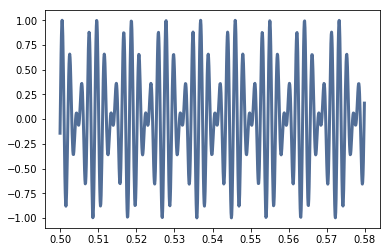

In [181]:
wave.segment(0.5,0.08).plot()

<hr>

## Pythagorean Tuning

### Major scale in Pythagorean tuning

$1, 9/8, 81/64, 4/3, 3/2, 27/16, 243/128, 2$

In [182]:
frequency = 261.63   # C4

In [183]:
py_major_scale = [1, 9/8, 81/64, 4/3, 3/2, 27/16, 243/128, 2]

wave = make_scale_wave(frequency, py_major_scale)
wave.make_audio()

### Comparison to just intonation

In [184]:
wave = compare_scale_wave(frequency, ji_major_scale, py_major_scale)
wave.make_audio()

### Syntonic Comma


$81/64 : 5/4 = 81/80 = 1.0125$

### Major triad

In [233]:
frequency = 440.0   # A4

In [234]:
wave = make_triad_wave(frequency, py_major_scale)
wave.make_audio()

### Comparison of major triads of JI and PT

In [235]:
wave = compare_triad_wave(frequency, ji_major_scale, py_major_scale)
wave.make_audio()

### 1-3 Chord

In [236]:
wave = make_1_3_wave(frequency, py_major_scale)
wave.make_audio()

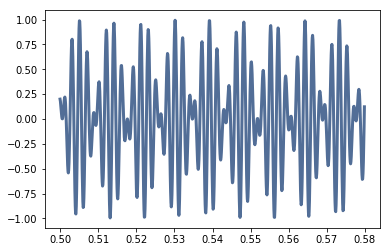

In [237]:
wave.segment(0.5,0.08).plot()

### Pythagorean Comma

$312/219 \approx 1.013643265$

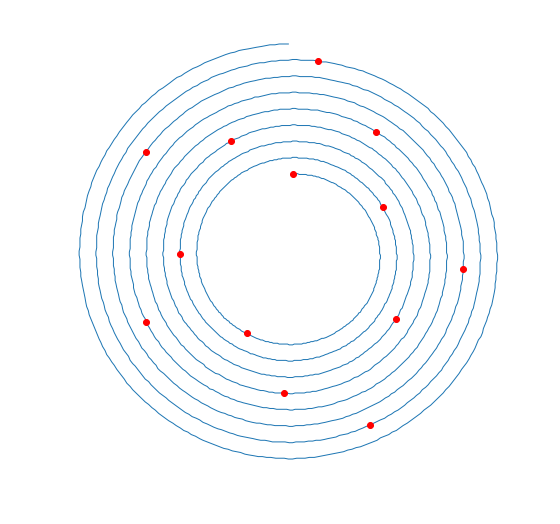

In [190]:
amp = 100
inc = 20
resol = 300


def makenoteratio(m, num):
    p = np.full(num,0.0)
    p[0] = 1
    for i in range(num-1):
        r = p[i] * m
        p[i+1] = r  
    p.sort()
    return(p)

def makenotepos(p):
    l = len(p)
    pos = np.full(l,0.0)
    for i in range(l):
        pos[i] = round((np.log(p[i])/np.log(2) * resol))
    return(pos)

def notespiral(notepos, numshell):
    i = 0
    l = len(notepos)
    x = np.full(resol*numshell,0)
    y = np.full(resol*numshell,0)
    dotx = np.full(l,0)
    doty = np.full(l,0)
    
    for shell in range(numshell):
        for t in range(resol):
            ampinc = amp + inc * t / resol + shell * inc
            x[shell*resol+t] = ampinc * np.sin(2 * np.pi * t / resol)
            y[shell*resol+t] = ampinc * np.sin(2 * np.pi * t / resol + np.pi/2)        
       
            if (shell * resol + t) == notepos[i]:
                dotx[i] = x[shell * resol + t]
                doty[i] = y[shell * resol + t]
                i = (i + 1) % l
    return x, y, dotx, doty

p = makenoteratio(3/2, 13)
pos = makenotepos(p)    
x, y, dotx, doty = notespiral(pos, 8)
plt.figure(figsize=(9,9))
plt.axis([-amp*3, amp*3, -amp*3, amp*3])
plt.axis('off')
plt.plot(x,y,linewidth=1)
plt.plot(dotx, doty, 'ro')
plt.show()

### All notes in Pythagorean tuning

In [238]:
def make_Pythagorean_chromatic_scale():
    p = np.full(13,0.0)
    p[0] = 1
    for i in range(11):
        r = p[i] * 3/2
        if (r > 2):
            r = r/2
        p[i+1] = r  
    p[12] = 2
    p.sort()
    return(p)

In [239]:
frequency = 261.63   # C4

In [240]:
py_chromatic_scale = make_Pythagorean_chromatic_scale()
wave = make_scale_wave(frequency, py_chromatic_scale)
wave.make_audio()

<hr>

## Equal Temperament Tuning

### Major scale in equal temperament tuning

$1, 2^{1/6}, 2^{1/3}, 2^{5/12}, 2^{7/12}, 2^{3/4}, 2^{11/12}, 2$

In [194]:
frequency = 261.63   # C4

In [195]:
et_major_scale = [1, 2**(1/6), 2**(1/3), 2**(5/12), 2**(7/12), 2**(3/4), 2**(11/12), 2]

wave = make_scale_wave(frequency, et_major_scale)
wave.make_audio()

### Comparison of equal temperament tuning and just intonation

In [196]:
wave = compare_scale_wave(frequency, ji_major_scale, et_major_scale)
wave.make_audio()

### Comparison of equal temperament tuning and Pythagorean tuning

In [197]:
wave = compare_scale_wave(frequency, py_major_scale, et_major_scale)
wave.make_audio()

### Comparison of major triads of JI and ET

In [ ]:
frequency = 440     # A4

In [198]:
wave = compare_triad_wave(frequency, ji_major_scale, et_major_scale)
wave.make_audio()

### 1-3 Chord

In [199]:
wave = make_1_3_wave(frequency, et_major_scale)
wave.make_audio()

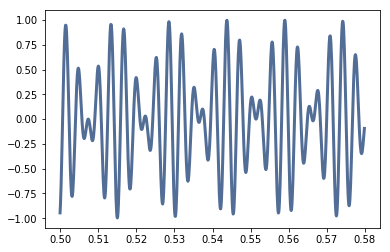

In [200]:
wave.segment(0.5,0.08).plot()

### All notes in equal temperament tuning

In [201]:
def make_ET_chromatic_scale():
    p = np.full(13,0.0)
    for i in range(13):
        p[i] = 2**(i/12)
    return(p)

In [202]:
et_chromatic_scale = make_ET_chromatic_scale()
wave = make_scale_wave(frequency, et_chromatic_scale)
wave.make_audio()

<hr>

## Meantone Temperament Tuning

### Major scale in meantone temperament

$1, \sqrt{5}:2, 5:4, 2:5^{1/4}, 5^{1/4}, 5^{3/4}:2, 5^{5/4} :4, 2$

In [203]:
frequency = 261.63   # C4

In [204]:
mt_major_scale = [1, np.sqrt(5)/2, 5/4, 2/(5**(1/4)), 5**(1/4), 5**(3/4)/2, 5**(5/4)/4, 2]

wave = make_scale_wave(frequency, mt_major_scale)
wave.make_audio()

### Comparison to just intonation

In [205]:
wave = compare_scale_wave(frequency, ji_major_scale, mt_major_scale)
wave.make_audio()

### Major triad

In [ ]:
frequency = 440     # A4

In [206]:
wave = make_triad_wave(frequency, mt_major_scale)
wave.make_audio()

### Comparison of major triads of JI and MT

In [207]:
wave = compare_triad_wave(frequency, ji_major_scale, mt_major_scale)
wave.make_audio()

### 1-3 Chord

In [208]:
wave = make_1_3_wave(frequency, mt_major_scale)
wave.make_audio()

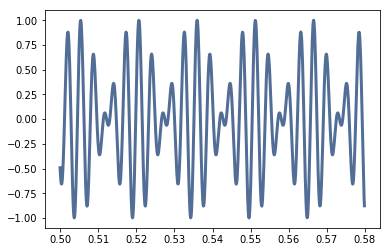

In [209]:
wave.segment(0.5,0.08).plot()

<hr>

## Beat frequency

In [210]:
beat_frequency = 1
f1 = 220
f2 = f1 + beat_frequency

In [211]:
wave = thinkdsp.sin_wave(f1, 4)
wave = wave + thinkdsp.sin_wave(f2, 4)
wave.normalize()
wave.make_audio()

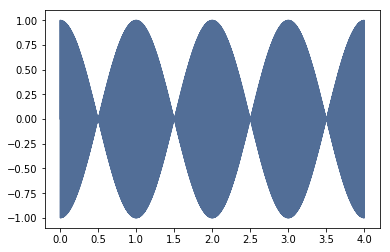

In [212]:
wave.plot(linewidth=1)

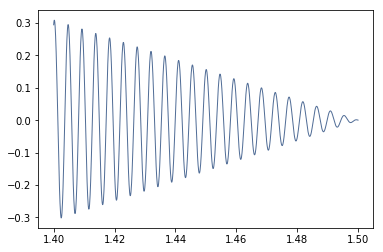

In [213]:
seg = wave.segment(1.4,0.1)
seg.plot(linewidth=1)

## Dissonance with partials

In [214]:
def make_note_with_partial(frequency, partial, duration):
    l = len(partial)
    w = thinkdsp.sin_wave(frequency, duration)
    w.scale(0)
    for i in range(l):
        p = thinkdsp.sin_wave(frequency*(i+1), duration)
        p.scale(partial[i])
        w = w + p
    w.normalize()
    return(w)

In [215]:
f1 = 220
f2 = 445
#ratio = 3/2
#f2 = f1 * ratio

partial = [1.0, 0.9, 0.7, 0.5, 0.4, 0.3]

In [216]:
wave1 = make_note_with_partial(f1,partial,2)
wave2 = make_note_with_partial(f2,partial,2)
wave = wave1 + wave2
wave.normalize()
wave.make_audio()

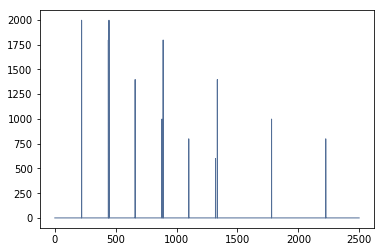

In [217]:
s = wave.make_spectrum()
s.plot(high=2500, linewidth=1)

<hr>

## Artificial Spectra

In [218]:
def make_note_with_overtone(overtone1, overtone2):
    partial = [1.0, 0.9, 0.7, 0.5]

    w1 = thinkdsp.sin_wave(0, 2)
    w1.scale(0)
    for i in range(4):
        p = thinkdsp.sin_wave(overtone1[i], 2)
        p.scale(partial[i])
        w1 = w1 + p

    w2 = thinkdsp.sin_wave(0, 2)
    w2.scale(0)
    for i in range(4):
        p = thinkdsp.sin_wave(overtone2[i], 2)
        p.scale(partial[i])
        w2 = w2 + p

    wave = w1 + w2
    wave.normalize()
    return(wave)


In [219]:
overtone1 = [440 , 860 , 1203 , 1683]
overtone2 = [225, 440, 615, 860]

wave = make_note_with_overtone(overtone1,overtone2)
wave.make_audio()

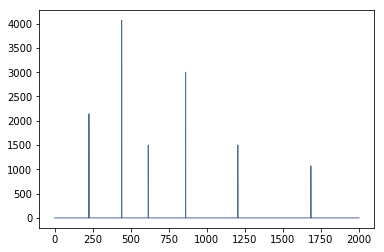

In [220]:
s = wave.make_spectrum()
s.plot(high=2000, linewidth=1)

In [221]:
overtone1 = [440, 860, 1203, 1683]
overtone3 = [220, 430, 602, 841]

wave = make_note_with_overtone(overtone1,overtone3)
wave.make_audio()

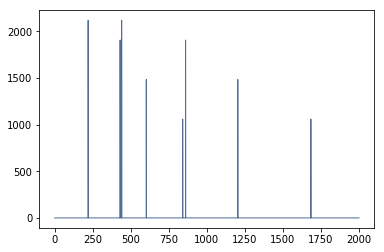

In [222]:
s = wave.make_spectrum()
s.plot(high=2000, linewidth=1)